# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data and Libraries

In [1]:
import time
import pickle
import numpy as np
import random
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mplcolors
from scipy.ndimage import rotate
from scipy.ndimage import zoom
from scipy.misc import imsave
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten

#training_file = "./new_imgs/augmented_Train400.p"
#training_file = "./new_imgs/augmented_normalized_Train.p"
training_file = "./traffic-signs-data/train.p"
validation_file= "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("X valid shape:", X_valid.shape)
print("y valid shape:", y_valid.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (34799, 32, 32, 3)
y train shape: (34799,)
X valid shape: (4410, 32, 32, 3)
y valid shape: (4410,)
X test shape: (12630, 32, 32, 3)
y test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

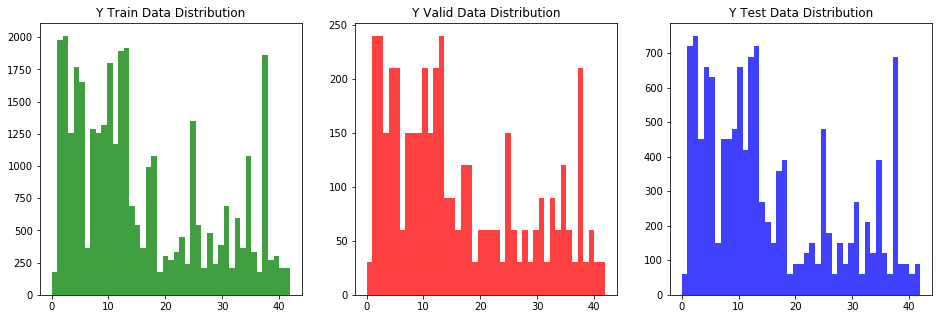

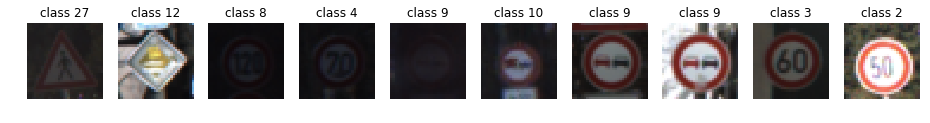

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
%matplotlib inline
mplnorm = mplcolors.Normalize(vmin = -1, vmax = 1)

plt.figure(figsize=(10,10))

fig, axs = plt.subplots(1,3, figsize=(16, 5))

axs[0].hist(y_train, 43, facecolor='g', alpha=0.75)
axs[0].set_title("Y Train Data Distribution")

axs[1].hist(y_valid, 43, facecolor='r', alpha=0.75)
axs[1].set_title("Y Valid Data Distribution")

axs[2].hist(y_test, 43, facecolor='b', alpha=0.75)
axs[2].set_title("Y Test Data Distribution")

no_plotted_signs = 10
index = random.sample(range(len(X_train)), no_plotted_signs)

fig, axs = plt.subplots(1,no_plotted_signs, figsize=(16, 8))

for i in range(no_plotted_signs):
    image = X_train[index[i]]
    
    if image.max() <= 1:
        image  = mplnorm(image)
    
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title("class {}".format(y_train[index[i]]))

#for i, image in enumerate(X_train):
#    if i < 20:
#        ran_index = random.randint(0, len(X_train))  
#        imsave('./imgs/X_train{}.jpg'.format(ran_index), X_train[ran_index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [21]:
# Helper function
def normalize_imgs(imgs, option = 1):
    X_train_normalized = imgs.copy()
     
    for i, image in enumerate(X_train_normalized):
        if i == 0:
            X_train_normalized = X_train_normalized.astype('float64')
        image = image.astype('float64')
        
        for color in range(3):
            min_val = image[:,:, color].min()
            min_val = min_val.astype('float64')        
            max_val = image[:,:, color].max()
            max_val = max_val.astype('float64')

            val_range = (max_val - min_val)

            ###### Normalize for range 0, 1
            if option == 0:
                image[:,:, color] = (image[:,:,color] - (min_val)) / (val_range)
            ###### Normalize for range -1, 1
            elif option == 1:
                image[:,:, color] = (image[:,:,color] - (val_range/2 + min_val)) / (val_range/2)

            X_train_normalized[i] = image
        
    return X_train_normalized


X_train shape: (34799, 32, 32, 3)
X_train_norm shape: (34799, 32, 32, 3)
Mean of raw data:  82.677589037
Mean of normalized data:  -0.305579028335


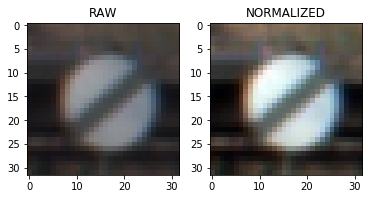

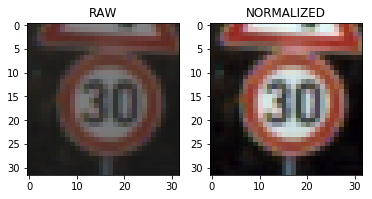

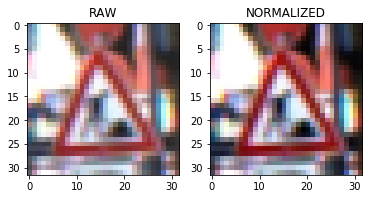

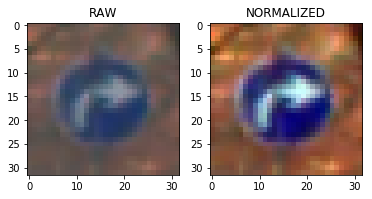

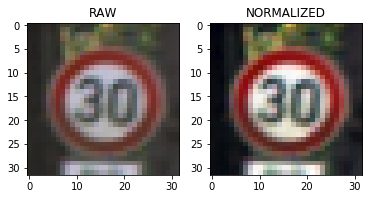

In [22]:
# NORMALIZATION
if training_file == "./traffic-signs-data/train.p":
    normalize = 1
else:
    normalize = 0
    
mplnorm = mplcolors.Normalize(vmin = -1, vmax = 1)

if normalize == 1:

    X_train_norm = normalize_imgs(X_train)
        
    for i in range(5):
        fig, axs = plt.subplots(1,2)
        ran_index = random.randint(0, len(X_train))    
        image = X_train[ran_index]
        
        if image.max() <= 1:
            image  = mplnorm(image)
            
        axs[0].imshow(image)
        axs[0].set_title('RAW')

        axs[1].imshow(mplnorm(X_train_norm[ran_index]))
        axs[1].set_title('NORMALIZED')
        
    print('X_train shape:', X_train.shape)
    print('X_train_norm shape:', X_train_norm.shape)
    print("Mean of raw data: ", np.mean(X_train))
    print("Mean of normalized data: ",  np.mean(X_train_norm))
    X_train = X_train_norm
    
    
X_test_norm = normalize_imgs(X_test)
X_valid_norm = normalize_imgs(X_valid)
 
X_valid = X_valid_norm
X_test = X_test_norm

# Augmentation for weak classes

In [23]:
### Helper function

def augmen_img(img,  plot = 0, range_colorshift = 8, range_zoom = 0.08, range_rotate = 8,  range_move = 2, warp_factor = 3):
    
    org_img = img.copy()
    x, y = img.shape[:2]

    ######################## COLORSHIFT
    for color in range(3):
       
        rand_shift = np.random.uniform(1 - range_colorshift, 1)
        
        img[:,:,color ] = img [:,:,color ] * rand_shift

    ######################## WARP
    f1 = random.uniform(-1, 1 )
    f2 = random.uniform(-1, 1 )
    f3 = random.uniform(-1, 1 )

    pts1 = np.float32([[0,0],[31,0],[0,31]])
    pts2 = np.float32([[0 + warp_factor*f1,0 + warp_factor*f1],[31 - warp_factor*f2,0 + warp_factor*f2],[0+warp_factor*f3,31-warp_factor*f3]])
        
    M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,M,(x,y))    
    
    ######################## ZOOM
    zoom_factor = random.uniform(1 - range_zoom, 1 + range_zoom)     

    newy = (y // zoom_factor )
    newx = (x // zoom_factor )
    deltax = newx - x
    deltay = newx - x

    pts1 = np.float32([[0,0],[31,0],[0,31]])
    pts2 = np.float32([[-deltax,-deltax],[newy,-deltax],[-deltax,newy]])

    M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,M,(x,y))

    ########################## ROTATE
    angle = np.random.randint(-range_rotate, range_rotate)
    
    M = cv2.getRotationMatrix2D((x/2,y/2),angle,1)
    img = cv2.warpAffine(img,M,(x,y))
    
    ####################### MOVE
    dx = np.random.randint(-range_move, range_move) 
    dy = np.random.randint(-range_move, range_move) 
    
    # roll
    img = np.roll(img, dx, 1)
    img = np.roll(img, dy, 0)
    
    if dx > 0:
        img[:,0:dx,:] = 0
    elif dx < 0:
        img[:,dx:,:] = 0

    if dy > 0:
        img[0:dy,:,:] = 0
    elif dy < 0:
        img[dy:,:,:] = 0
    
    if plot:
        fig, axs = plt.subplots(1,2, figsize=(10, 10))
        axs[0].imshow(org_img)
        axs[0].set_title('original')

        axs[1].imshow(img)
        axs[1].set_title("Augmented, dx: {}, dy: {}, zoom-factor: {}, rot-angle: {}, colornoise: {},{},{}".format(dx, dy, zoom_factor, angle, rand_noise[0], rand_noise[1], rand_noise[2]))

    return img

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('finished')

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
finished


X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
Mean number of samples in X_train: 200
Minimum number of samples in X_train: 180
class: 0 , n_samples: 180 :20 new; 
class: 1 , n_samples: 1980 :
class: 2 , n_samples: 2010 :
class: 3 , n_samples: 1260 :
class: 4 , n_samples: 1770 :
class: 5 , n_samples: 1650 :
class: 6 , n_samples: 360 :
class: 7 , n_samples: 1290 :
class: 8 , n_samples: 1260 :
class: 9 , n_samples: 1320 :
class: 10 , n_samples: 1800 :
class: 11 , n_samples: 1170 :
class: 12 , n_samples: 1890 :
class: 13 , n_samples: 1920 :
class: 14 , n_samples: 690 :
class: 15 , n_samples: 540 :
class: 16 , n_samples: 360 :
class: 17 , n_samples: 990 :
class: 18 , n_samples: 1080 :
class: 19 , n_samples: 180 :20 new; 
class: 20 , n_samples: 300 :
class: 21 , n_samples: 270 :
class: 22 , n_samples: 330 :
class: 23 , n_samples: 450 :
class: 24 , n_samples: 240 :
class: 25 , n_samples: 1350 :
class: 26 , n_samples: 540 :
class: 27 , n_samples: 210 :
class: 28 , n_samples: 480 :


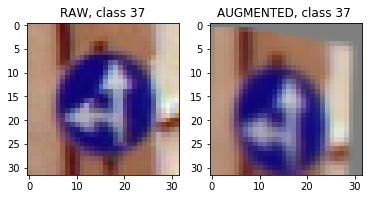

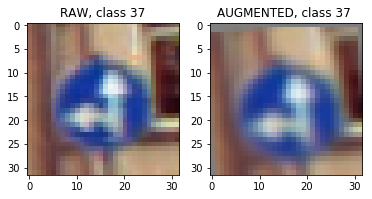

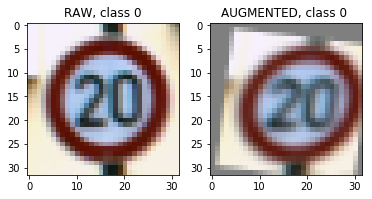

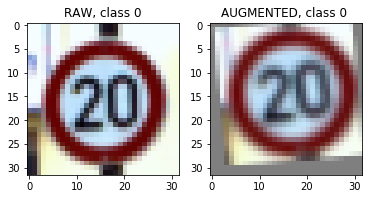

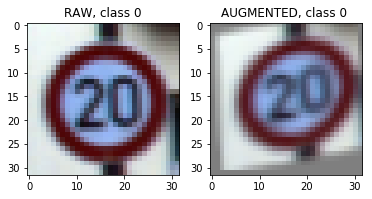

In [24]:
# AUGMENTATION FOR underrepresented CLASSES
if training_file == "./traffic-signs-data/train.p":
    augment = 1
else:
    augment = 0
    
# this describes how much of each manipulation function will affect the original image
# aug_ranges = Colorshift, zoom, rotate, move, warp
aug_ranges =  [0.12, 0.06, 7, 2, 4]

hist, bins = np.histogram(y_train, bins = n_classes)
mean_no_of_samples = np.ceil(np.mean(hist))
mean_no_of_samples = mean_no_of_samples.astype(int)

# override with manual value
mean_no_of_samples = 200

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape) 

if augment==1 : 
    print("Mean number of samples in X_train:", mean_no_of_samples)
    print("Minimum number of samples in X_train:", min(hist))
    
    index_of_aug = []
    index_of_org = []
    
    new_images = np.empty([0, 32, 32, 3])
    new_labels = []

    for class_n in range(n_classes):
        
        print("class:", class_n, ',', end='')

        class_indices = np.where(y_train == class_n)

        n_samples = len(class_indices[0])
        print(" n_samples:", n_samples, ':', end='')

        class_indices = class_indices[0]

        if n_samples < mean_no_of_samples:
            n = 0;
            for i in range(mean_no_of_samples - n_samples):

                if n < n_samples:
                    if n == n_samples-1:
                        n = 0

                    old_img = X_train[class_indices[n]]
                    new_img = augmen_img(old_img, 0, aug_ranges[0], aug_ranges[1], aug_ranges[2],aug_ranges[3],aug_ranges[4])
                    n += 1                      
                    
                    X_train = np.concatenate((X_train, [new_img]), axis=0)
                    y_train = np.concatenate((y_train, [class_n]), axis=0)

                    index_of_org.append(class_indices[n])
                    index_of_aug.append(len(X_train))
  
                    if i % 50 == 0 and i>0  :
                        print('{:.0f}%, '.format(i / (mean_no_of_samples - n_samples - 1)*100 ), end='')
                    
                    if i == (mean_no_of_samples - n_samples - 1):
                        print(i+1 , 'new; ',end='')
            
        print('')
        
    ### dump into .p-file
    augmentedX = {'features' : X_train, 'labels': y_train}
        
    with open('./new_imgs/augmented_Train400.p', 'wb') as handle:
        pickle.dump(augmentedX, handle, protocol=pickle.HIGHEST_PROTOCOL)

    ### plot examples
    no_plotted_signs = 5

    index = random.sample(range(len(index_of_aug)-1), no_plotted_signs)
    print('----------------------')
    print("AUGMENTED IMAGES EXAMPLE; ", no_plotted_signs, "images")

    for i in range(no_plotted_signs):
        fig, axs = plt.subplots(1,2)

        axs[0].imshow(mplnorm(X_train[index_of_org[index[i]]]))
        axs[0].set_title('RAW, class {}'.format(y_train[index_of_org[index[i]]]))

        axs[1].imshow(mplnorm(X_train[index_of_aug[index[i]]]))
        axs[1].set_title('AUGMENTED, class {} '.format(y_train[index_of_aug[index[i]]]))
        

    
    

X_train shape: (34859, 32, 32, 3)
y_train shape: (34859,)


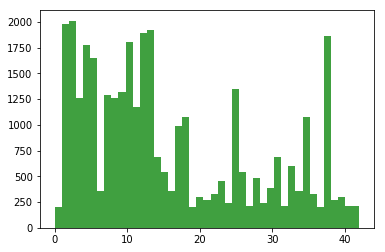

In [25]:
# Distribution after Augmention   
histplot = plt.hist(y_train, 43, facecolor='g', alpha=0.75) 

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape) 



## Model Architecture

Architecture functions

In [26]:
if 'sess' in globals() or 'sess' in locals():
    print("sessions closed")
    sess.close()


def conv_layer(x,
               f_size,
               dim_output,
               padding,
               stride = 1,
               pool_size = None,
               pool_padding = None,
               pool_stride = 2,
               print_shapes = 0,
               return_more = 0,
               mu = 0,
               sigma = 0.1,
               activation ='relu'):

    input_shape = x.get_shape()
    input_shape = input_shape[1:]
    dim_input = int(input_shape[2])

    # Convolutional
    conv_W = tf.Variable(tf.truncated_normal(shape=(f_size, f_size, dim_input, dim_output), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(dim_output))
    conv   = tf.nn.conv2d(x, conv_W, strides=[1, stride, stride, 1], padding=padding) + conv_b

    # Activation
    if activation == 'relu':
        conv    = tf.nn.relu(conv)
    elif activation == 'tanh':
        conv    = tf.nn.tanh(conv)
    elif activation == 'softmax':
        conv    = tf.nn.softmax(conv)

    # Pooling
    if pool_size is not None and pool_padding is not None:

        conv = tf.nn.max_pool(conv,
                              ksize=[1, pool_size, pool_size, 1],
                              strides=[1, pool_stride, pool_stride, 1],
                              padding=pool_padding)

    output_shape = conv.get_shape()
    output_shape = output_shape[1:]

    if print_shapes:
        print('++++ shape of convolution layer ++++')
        print("input shape:", input_shape)
        print("output_shape:", output_shape)
        print('')

    if return_more:
        return conv, conv_W, input_shape, output_shape

    return conv

def fc_layer(x,
             dim_output,
             print_shapes = 0,
             return_more = 0,
             mu = 0, 
             sigma = 0.1,
             activation = 'relu'):

    input_shape = x.get_shape()
    input_shape = input_shape[1]
    dim_input = int(input_shape)

    # 
    fc_W = tf.Variable(tf.truncated_normal(shape=(dim_input, dim_output), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(dim_output))
    fc   = tf.matmul(x, fc_W) + fc_b

    # Activation
    if activation == 'relu':
        fc    = tf.nn.relu(fc)
    elif activation == 'tanh':
        fc   = tf.nn.tanh(fc)
    elif activation == 'softmax':
        fc   = tf.nn.softmax(fc)

    output_shape = fc.get_shape()
    output_shape = output_shape[1:]

    if print_shapes:
        print('++++ shape of fully connected layer ++++')
        print("input shape:", input_shape)
        print("output_shape:", output_shape)
        print('')

    if return_more:
        return fc, fc_W, input_shape, output_shape

    return fc

In [27]:
# Architecture 0
def LeNet_original(x):
    conv0 = conv_layer(x,
                       f_size = 5,
                       dim_output = 6,
                       padding = 'VALID',
                       pool_size = 2,
                       pool_padding = 'VALID',
                       print_shapes = 1)
    
    conv1 = conv_layer(conv0,
                       f_size = 5,
                       dim_output = 16,
                       padding = 'VALID',
                       pool_size = 2,
                       pool_padding = 'VALID',
                       print_shapes = 1)
    
    conv1flat = flatten(conv1)
    
        
    fc1 = fc_layer(conv1flat,
                   dim_output = 120,
                   print_shapes = 1,
                   activation = 'relu')
    
    fc2 = fc_layer(fc1,
                   dim_output = 84,
                   print_shapes = 1,
                   activation = 'relu')
    
    logits = fc_layer(fc2,
                   dim_output = 43,
                   print_shapes = 1,
                   activation = None)
    regularizers = 0
    return logits, regularizers

In [28]:
# Architecture 1
def LeNet_modified(x):
    
    conv0, conv0_W, _, _ = conv_layer(x,
                       f_size = 1,
                       dim_output = 3,
                       padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)
        
    conv1, conv1_W, _, _ = conv_layer(conv0,
                       f_size = 5,
                       dim_output = 6,
                       padding = 'VALID',
                       pool_size = 2,
                       pool_padding = 'VALID',
                       print_shapes = 1,
                       return_more = 1)
    conv1 = tf.nn.dropout(conv1, keep_prob) 
    
    
    conv2, conv2_W, _, _ = conv_layer(conv0,
                       f_size = 5,
                       dim_output = 16,
                       padding = 'VALID',
                       pool_size = 2,
                       pool_padding = 'VALID',
                       print_shapes = 1,
                       return_more = 1)
    conv2 = tf.nn.dropout(conv2, keep_prob)  
    
    conv3, conv3_W, _, _ = conv_layer(conv2,
                       f_size = 5,
                       dim_output = 80,
                       padding = 'VALID',
                       print_shapes = 1,
                       return_more = 1)
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    conv1flat = flatten(conv1)
    conv2flat = flatten(conv2)
    conv3flat = flatten(conv3)    
    
    convflat = tf.concat([conv1flat, conv2flat, conv3flat], 1)  
    # Dropout
    
    #convflat = tf.nn.dropout(convflat, keep_prob)
    print("conv1flat shape:",conv1flat.get_shape()[1])
    print("conv2flat shape:",conv2flat.get_shape()[1])
    print("conv3flat shape:",conv3flat.get_shape()[1])
    
    fc1, fc1_W, _, _ = fc_layer(convflat,
                   dim_output = 129,
                   print_shapes = 1,
                   activation = 'relu',
                   return_more = 1)
    
    logits, fc2_W, _, _ = fc_layer(fc1,
                   dim_output = 43,
                   print_shapes = 1,
                   activation = None,
                   return_more = 1)
 
        
    regularizers = (  tf.nn.l2_loss(conv0_W) + tf.nn.l2_loss(conv1_W)
                    + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W)
                    + tf.nn.l2_loss(fc1_W)  + tf.nn.l2_loss(fc2_W))
    
    return logits, regularizers 

In [29]:
# Architecture 2
# inspired by VGG Net http://cs231n.github.io/assets/cnn/convnet.jpeg & https://arxiv.org/pdf/1409.1556.pdf
def CNN_final(x):
    ############ Layer 0 ##################
    print('Layer 0')
    # Convolutional. Input = 32x32x3. Output = 32x32x3.
    conv0, conv0_W, _, _ = conv_layer(x,
                       f_size = 1,
                       dim_output = 3,
                       padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)

    ############ Layer 1&2 ##################
    print('Layer 1&2')
    conv1, conv1_W, _, _= conv_layer(conv0,
                       f_size = 5,
                       dim_output = 32,
                       padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)
        
    conv2, conv2_W, _, _ = conv_layer(conv1,
                       f_size = 5,
                       dim_output = 32,
                       padding = 'SAME',
                       pool_size = 2,
                       pool_padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)
    # Dropout
    conv2_drop = tf.nn.dropout(conv2, keep_prob)
    
    ############ Layer 3&4 ##################
    print('Layer 3&4')
    conv3, conv3_W, _, _ = conv_layer(conv2_drop,
                       f_size = 5,
                       dim_output = 64,
                       padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)
    
    conv4, conv4_W, _, _ = conv_layer(conv3,
                       f_size = 5,
                       dim_output = 64,
                       padding = 'SAME',
                       pool_size = 2,
                       pool_padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)
    
    # Dropout
    conv4_drop = tf.nn.dropout(conv4, keep_prob)
    
    ############# Layer 5&6 ################
    print('Layer 5&6')
    # 
    conv5, conv5_W, _, _ = conv_layer(conv4_drop,
                       f_size = 5,
                       dim_output = 128,
                       padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)
    
    conv6, conv6_W, _, _ = conv_layer(conv5,
                       f_size = 5,
                       dim_output = 128,
                       padding = 'SAME',
                       pool_size = 2,
                       pool_padding = 'SAME',
                       print_shapes = 1,
                       return_more = 1)
    
    # Dropout
    conv6_drop = tf.nn.dropout(conv6, keep_prob)
    
    ############# Flatten ##################
    # Flatten
    conv2flat = flatten(conv2_drop)
    conv4flat = flatten(conv4_drop)
    conv6flat = flatten(conv6_drop)
    
    print("conv2flat shape:",conv2flat.get_shape()[1])
    print("conv2flat shape:",conv4flat.get_shape()[1])
    print("conv3flat shape:",conv6flat.get_shape()[1])

    # Concat 
    convflat = tf.concat([conv2flat, conv4flat, conv6flat], 1)
    print("convflat shape:",convflat.get_shape()[1])
    
    ################################
    print('FC 1')
    #
    fc1, fc1_W, _, _ = fc_layer(convflat,
                   dim_output = 1024,
                   print_shapes = 1,
                   activation = 'relu',
                   return_more = 1)
    
    # Dropout
    fc1_drop = tf.nn.dropout(fc1, keep_prob)
    ################################
    print('FC 2')
    # 
    fc2, fc2_W, _, _ = fc_layer(fc1_drop,
                   dim_output = 512,
                   print_shapes = 1,
                   activation = 'relu',
                   return_more = 1)
    # Dropout
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    ################################
    print('FC 3')
    #
    logits, logits_W, _, _ = fc_layer(fc2_drop,
                      dim_output = 43,
                      print_shapes = 1,
                      return_more = 1,
                      activation = None)
    
    regularizers = (  tf.nn.l2_loss(conv0_W) + tf.nn.l2_loss(conv1_W)
                    + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W)
                    + tf.nn.l2_loss(conv4_W) + tf.nn.l2_loss(conv5_W)
                    + tf.nn.l2_loss(conv6_W)
                    + tf.nn.l2_loss(fc1_W)  + tf.nn.l2_loss(fc2_W) 
                    + tf.nn.l2_loss(logits_W))
    
    return logits, regularizers

print('Architecture finished')


Architecture finished


In [30]:
# Variable initialization
if 'sess' in globals() or 'sess' in locals():
    print("sessions closed")
    sess.close()
    
tf.reset_default_graph() 

keep_prob = tf.placeholder(tf.float32) # probability to keep units

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, 43)

print('finished')


# Chose architecture

#logits, regularizers = LeNet_original(x)
#logits, regularizers = LeNet_modified(x)
logits, regularizers = CNN_final(x)

finished
Layer 0
++++ shape of convolution layer ++++
input shape: (32, 32, 3)
output_shape: (32, 32, 3)

Layer 1&2
++++ shape of convolution layer ++++
input shape: (32, 32, 3)
output_shape: (32, 32, 32)

++++ shape of convolution layer ++++
input shape: (32, 32, 32)
output_shape: (16, 16, 32)

Layer 3&4
++++ shape of convolution layer ++++
input shape: (16, 16, 32)
output_shape: (16, 16, 64)

++++ shape of convolution layer ++++
input shape: (16, 16, 64)
output_shape: (8, 8, 64)

Layer 5&6
++++ shape of convolution layer ++++
input shape: (8, 8, 64)
output_shape: (8, 8, 128)

++++ shape of convolution layer ++++
input shape: (8, 8, 128)
output_shape: (4, 4, 128)

conv2flat shape: 8192
conv2flat shape: 4096
conv3flat shape: 2048
convflat shape: 14336
FC 1
++++ shape of fully connected layer ++++
input shape: 14336
output_shape: (1024,)

FC 2
++++ shape of fully connected layer ++++
input shape: 1024
output_shape: (512,)

FC 3
++++ shape of fully connected layer ++++
input shape: 512
o

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [31]:
# Evaluate Function:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0 })
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('finished')

finished


In [32]:
X_train, y_train = shuffle(X_train, y_train)

In [33]:
# HYPERPARAMETERS
EPOCHS = 20

BATCH_SIZE = 128

#0.00001
regularize_factor = 0.00005

keep_probability = 0.47

# 0.0009; 0.001
start_learning_rate = 0.0015
final_learning_rate = 0.0001

# how many events where "validation acccuracy last epoch" > "validation acccuracy current epoch"
improv_stop = 15


optimizer = tf.train.AdamOptimizer(learning_rate = start_learning_rate)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) + regularize_factor * regularizers
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

print('finished')

finished


<IPython.core.display.Javascript object>


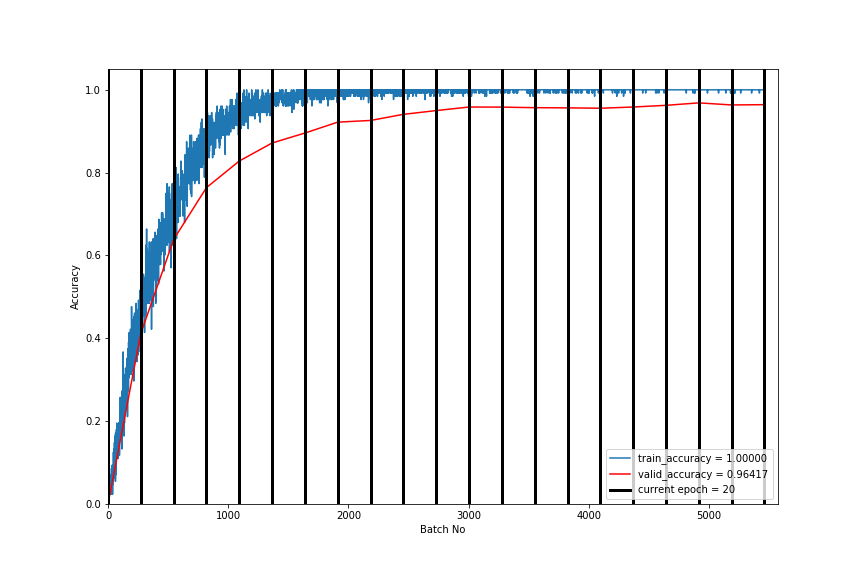

number of batches in epoch: 272
Training...

EPOCH 1
learning_rate: 0.0017000
Mean Training Accuracy for last epoch = 0.25423
time: 69.85785913467407 s
batch no: 273
Validation Accuracy = 0.41156
Next epoch at: 545 batches

EPOCH 2
learning_rate: 0.0004833
Mean Training Accuracy for last epoch = 0.59686
time: 71.54717683792114 s
batch no: 546
Validation Accuracy = 0.63878
Next epoch at: 818 batches

EPOCH 3
learning_rate: 0.0002535
Mean Training Accuracy for last epoch = 0.80119
time: 74.34092450141907 s
batch no: 819
Validation Accuracy = 0.76395
Next epoch at: 1091 batches

EPOCH 4
learning_rate: 0.0002101
Mean Training Accuracy for last epoch = 0.91501
time: 74.16090321540833 s
batch no: 1092
Validation Accuracy = 0.82812
Next epoch at: 1364 batches

EPOCH 5
learning_rate: 0.0002019
Mean Training Accuracy for last epoch = 0.96401
time: 88.8692934513092 s
batch no: 1365
Validation Accuracy = 0.87166
Next epoch at: 1637 batches

EPOCH 6
learning_rate: 0.0002004
Mean Training Accuracy 

<IPython.core.display.Javascript object>


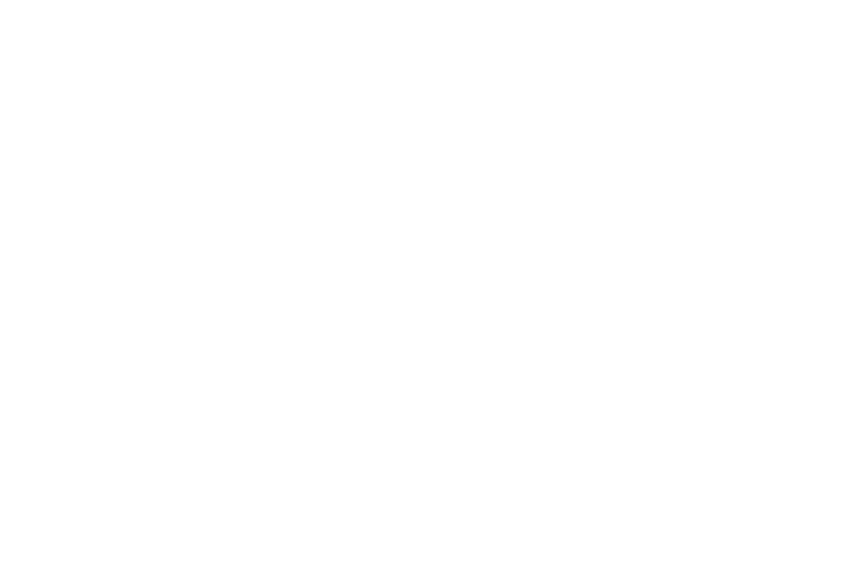

In [35]:
%matplotlib notebook
#plot_training = 0-> no plotting of training accuracy,
#plot_training = 1-> evaluation and plotting of training accuracy
plot_training = 1

#plot_validation = 0-> no plotting of validation accuracy,
#plot_validation = 1-> evaluation and plotting of validation accuracy every batch
#plot_validation = 2-> evaluation and plotting of validation accuracy every epoch
plot_validation = 2

training_starttime = time.time()

# plot last 10000 batches
show_no_of_batches = 10000 

batch_no = 0
batch_numbers = [0]

train_acc = [0]
train_loss = [0]

batch_valid = [0]
valid_acc = [0]

if plot_training or plot_validation :
    fig,ax = plt.subplots(1,1, figsize = (12,8))
    line1, = ax.plot(batch_numbers, train_acc, label='train accuracy')
    line2, = ax.plot(batch_valid, valid_acc, 'r', label='valid accuracy')
    epoch_line = ax.axvline(x = 0, linewidth=3, color='k', label = 'epoch')

    ax.set_xlabel('Batch No')
    ax.set_ylabel('Accuracy')

    plt.legend(handles=[line1, line2, epoch_line])
    plt.show() 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    counter = 0
    batches_in_epoch = num_examples // BATCH_SIZE
    print("number of batches in epoch:", batches_in_epoch)
    print("Training...")
    print()
    for i in range(EPOCHS):
        epoch_starttime = time.time()
        X_train, y_train = shuffle(X_train, y_train)
        
        learning_rate = start_learning_rate * np.exp(-i*(1/(EPOCHS*0.03))) + final_learning_rate
        print("EPOCH {}".format(i+1))
        print("learning_rate: {:.7f}".format(learning_rate))
            
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_probability})
            batch_no += 1
            
            if plot_training :
                ####plotting              
                train_accuracy = evaluate(batch_x, batch_y)
                
                if len(train_acc) <= show_no_of_batches:
                    train_acc.append(train_accuracy)
                    batch_numbers.append(batch_no)
                    

                else:
                    train_acc[:-1] = train_acc[1:]
                    train_acc[-1] = train_accuracy
                    batch_numbers[:-1] = batch_numbers[1:]
                    batch_numbers[-1] = batch_no
                    
                    valid_acc[:-1] = valid_acc[1:]
                    valid_acc[-1] = validation_accuracy
                    batch_numbers[:-1] = batch_numbers[1:]
                    batch_numbers[-1] = batch_no 
                    
                    
                line1.set_xdata(batch_numbers)
                line1.set_ydata(train_acc)
                line1.set_label("train_accuracy = {:.5f}".format(train_accuracy))

                plt.legend(handles=[line1, line2, epoch_line])
                ax.set_xlim(min(batch_numbers),max(batch_numbers)*1.02)
                ax.set_ylim(min(train_acc)*0.95,max(train_acc)*1.05)
                fig.canvas.draw()
                
                ##

            if plot_validation ==1 :
                validation_accuracy = evaluate(X_valid, y_valid) 

                valid_acc.append(validation_accuracy)
                batch_valid.append(batch_no)

                line2.set_xdata(batch_valid)
                line2.set_ydata(valid_acc)           
                line2.set_label("valid_accuracy = {:.5f}".format(validation_accuracy))

                plt.legend(handles=[line1, line2, epoch_line])
                
            if plot_validation and not plot_training:
                ax.set_xlim(min(batch_numbers),max(batch_numbers)*1.02)
                ax.set_ylim(min(valid_acc)*0.95,max(valid_acc)*1.05)
        
            fig.canvas.draw() 
            
        if plot_validation == 2:
                validation_accuracy = evaluate(X_valid, y_valid) 

                valid_acc.append(validation_accuracy)
                batch_valid.append(batch_no)

                line2.set_xdata(batch_valid)
                line2.set_ydata(valid_acc)           
                line2.set_label("valid_accuracy = {:.5f}".format(validation_accuracy))

                plt.legend(handles=[line1, line2, epoch_line])
                
        elif plot_validation == 0:
                validation_accuracy = evaluate(X_valid, y_valid)
                batch_valid.append(batch_no)
                valid_acc.append(validation_accuracy) 

        if plot_validation and not plot_training:
                ax.set_xlim(min(batch_numbers),max(batch_numbers)*1.02)
                ax.set_ylim(min(valid_acc)*0.95,max(valid_acc)*1.05)

        if plot_validation or plot_training:
                epoch_line = plt.axvline(x = batch_no, linewidth=3, color='k')            
                epoch_line.set_label("current epoch = {}".format(i+2)) 
                print("Mean Training Accuracy for last epoch = {:.5f}".format(np.mean(train_acc[-batches_in_epoch:])))
        print("time:", time.time() - epoch_starttime, "s" )    
        print("batch no:", batch_no)
        print("Validation Accuracy = {:.5f}".format(validation_accuracy))
        print("Next epoch at:", batch_no + batches_in_epoch, "batches")
        print()
        
        fig.canvas.draw()
        if len(valid_acc) > 1 and sum(validation_accuracy < valid_acc[-2:])>0:
            counter += 1
            
        if counter >= improv_stop and validation_accuracy < 0.97:
            print("---- {} times no improvement in validation accuracy, breaking...".format(improv_stop))
            break
              
        if validation_accuracy > 0.995:
            print("++++ Validation accuracy greater than 99,5%, breaking...")
            saver.save(sess, './CNNs/CNN_final_{:.5f}'.format(validation_accuracy))
            print("waiting for saving...")
            time.sleep(30)
            break
            
        if validation_accuracy >= 0.988:
            print("++++ Validation accuracy greater than 98,8%, saving...")
            saver.save(sess, './CNNs/CNN_final_{:.5f}'.format(validation_accuracy))
            print("waiting for saving...")
            time.sleep(30)
        
    print("total training time: {:.5f} s".format(time.time() - training_starttime))
    print("augment, normalize : ", augment, normalize )
    print("aug_ranges:" , aug_ranges)
    print("EPOCHS = ", EPOCHS)
    print("BATCH_SIZE = ", BATCH_SIZE)
    print("learning_rate = ", learning_rate)    
    saver.save(sess, './CNNs/CNN_final')
    print("Model saved")
    print("------> valid_acc.max = {:.5f}".format(max(valid_acc)))

In [36]:
# Test Set Accuracy 
use_this_CNN_path = './CNNs/CNN_final_0.98889'


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph(use_this_CNN_path + '.meta')
    saver2.restore(sess, use_this_CNN_path)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./CNNs/CNN_final_0.98889
Test Set Accuracy = 0.979


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images, also Normalizing

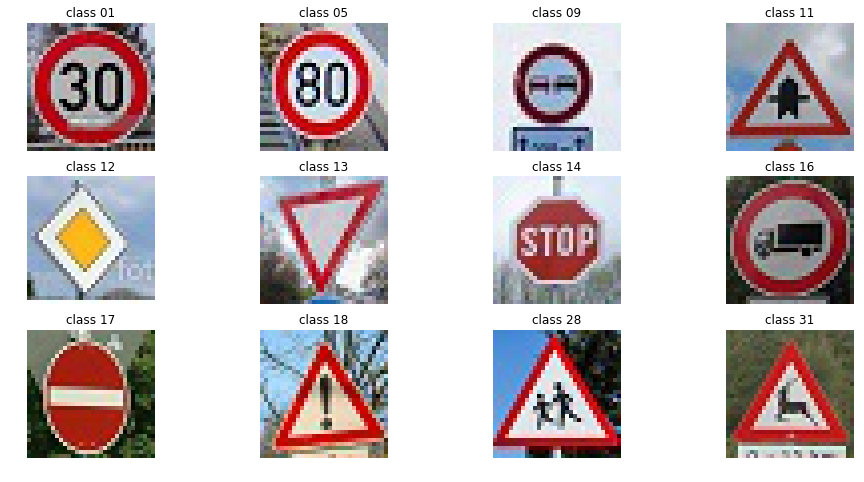

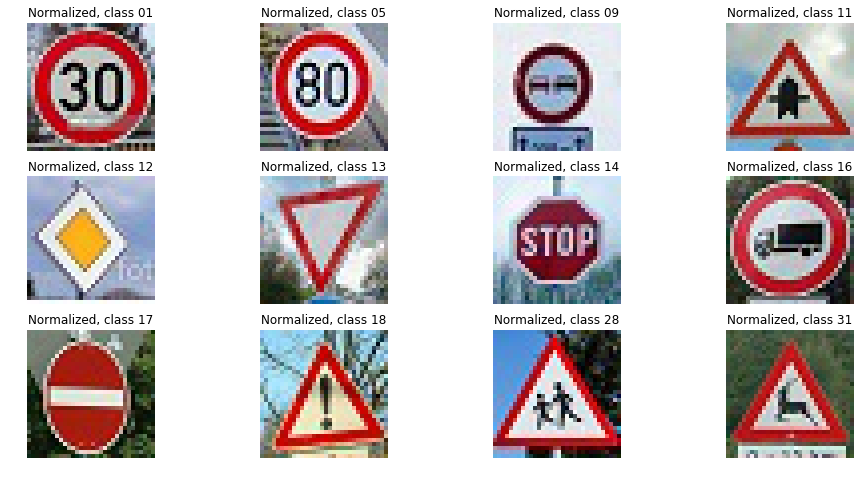

['01', '05', '09', '11', '12', '13', '14', '16', '17', '18', '28', '31']


In [37]:
%matplotlib inline

path = 'C:/Users/morit/CarND-Traffic-Sign-Classifier-Project/images/signs/*.jpg'

my_images = np.empty([0, 32, 32, 3])

my_labels = []

mplnorm = mplcolors.Normalize(vmin = -1, vmax = 1)
mplnorm2 = mplcolors.Normalize(vmin = 0, vmax = 255)

for i, img in enumerate(glob.glob(path)):
    my_labels.append(img[-6:-4])
    
    image = mpimg.imread(img)
    my_images = np.concatenate((my_images, [image]), axis=0)
    

fig, axs = plt.subplots(int(len(my_labels)/4),4, figsize=(16, 8))
axs = axs.ravel()

for i, image in enumerate(my_images):
    
    axs[i].axis('off')
    axs[i].imshow(mplnorm2(image))
    axs[i].set_title("class {}".format(my_labels[i]))

####### Normalize
my_images_norm = normalize_imgs(my_images.copy())

fig, axs = plt.subplots(int(len(my_labels)/4),4, figsize=(16, 8))
axs = axs.ravel()

for i, img in enumerate(my_images_norm):
    axs[i].axis('off')
    axs[i].imshow(mplnorm(img))
    axs[i].set_title("Normalized, class {}".format(my_labels[i]))

plt.show()

print(my_labels)

### Predict the Sign Type for Each Image

In [38]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.  

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph(use_this_CNN_path + '.meta')
    saver3.restore(sess, use_this_CNN_path)
    softmax = tf.nn.softmax(logits)
    
    results = sess.run(softmax, feed_dict={x: my_images_norm, keep_prob: 1.})
    print("Results: ", results.argmax(axis=1))



INFO:tensorflow:Restoring parameters from ./CNNs/CNN_final_0.98889
Results:  [ 1  5  9 11 12 13 14 16 17 18 28 31]


### Analyze Performance

In [39]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph(use_this_CNN_path + '.meta')
    saver3.restore(sess, use_this_CNN_path)
    
    my_accuracy = evaluate(my_images_norm, my_labels)
    print("New Images Test Set Accuracy = {:.3f}".format(my_accuracy))
   

INFO:tensorflow:Restoring parameters from ./CNNs/CNN_final_0.98889
New Images Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [40]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
k = 3

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k)  

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph(use_this_CNN_path + '.meta')
    saver3.restore(sess, use_this_CNN_path)
    
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_norm, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_norm, keep_prob: 1.0})
    print(my_top_k)    

INFO:tensorflow:Restoring parameters from ./CNNs/CNN_final_0.98889
TopKV2(values=array([[  1.00000000e+00,   3.78210752e-09,   2.07336104e-09],
       [  9.91221189e-01,   8.57585389e-03,   8.11494538e-05],
       [  9.99779403e-01,   2.15169886e-04,   5.13145233e-06],
       [  1.00000000e+00,   7.25383816e-12,   4.17128300e-13],
       [  1.00000000e+00,   1.08198318e-24,   4.06219880e-25],
       [  1.00000000e+00,   1.13682054e-14,   3.73167184e-15],
       [  1.00000000e+00,   4.62876699e-13,   2.38265074e-15],
       [  9.99915838e-01,   3.25626315e-05,   2.49924342e-05],
       [  1.00000000e+00,   7.37005162e-12,   7.09353800e-12],
       [  1.00000000e+00,   2.86828318e-17,   2.68756073e-19],
       [  9.99684334e-01,   5.99044179e-05,   5.79675761e-05],
       [  9.99912024e-01,   7.59509785e-05,   3.94697327e-06]], dtype=float32), indices=array([[ 1,  2,  0],
       [ 5,  2,  1],
       [ 9, 16, 41],
       [11, 30, 33],
       [12, 40, 14],
       [13, 32, 17],
       [14, 

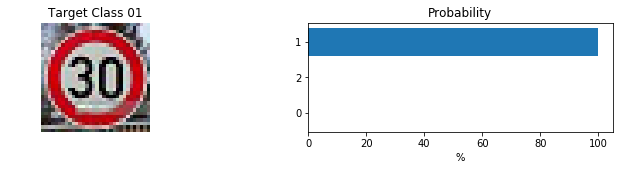

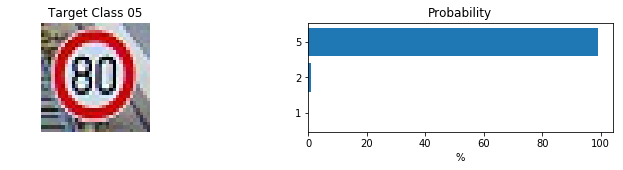

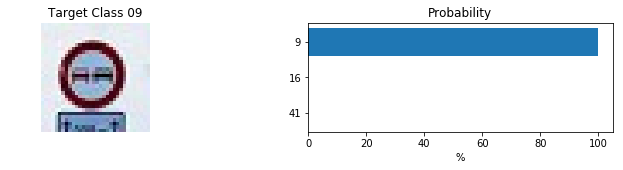

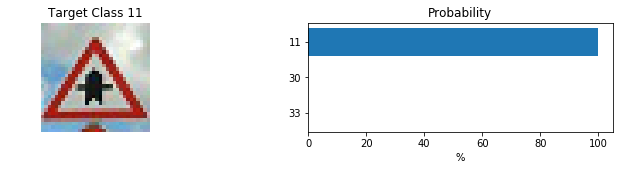

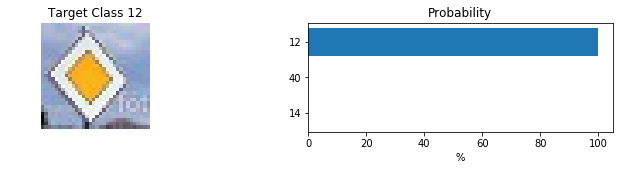

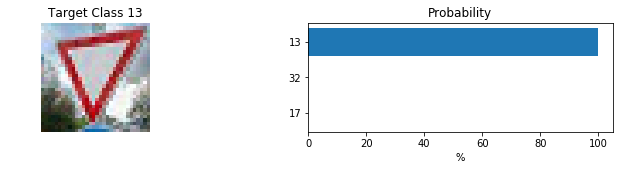

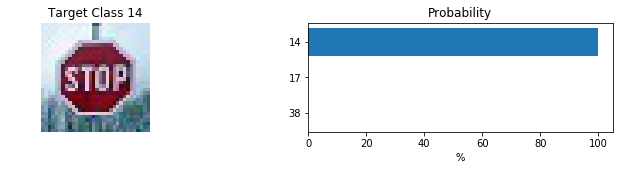

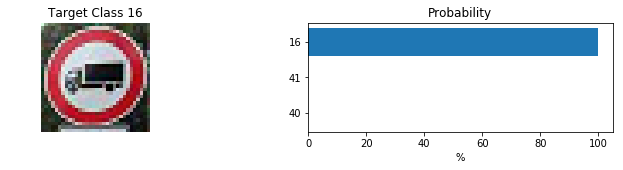

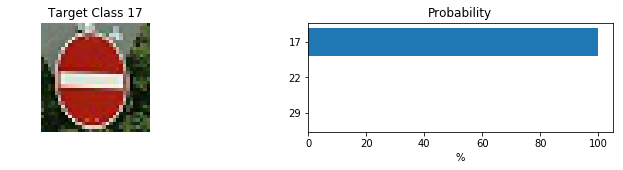

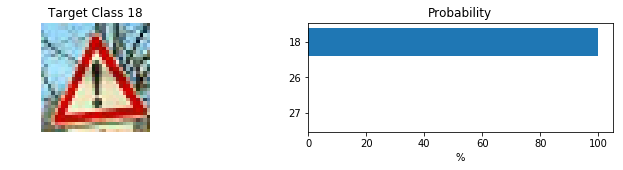

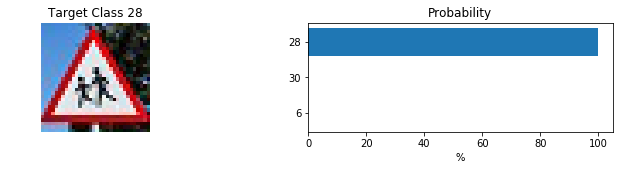

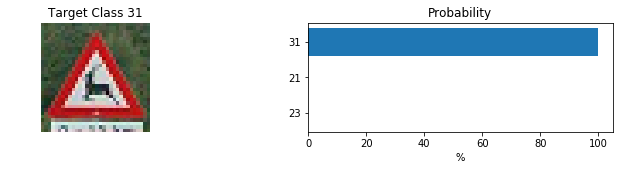

In [41]:

for i in range(len(my_labels)):

    fig, ax = plt.subplots(1,2,figsize = (12,2))
    ax[0].imshow(mplnorm(my_images_norm[i]))
    ax[0].axis('off')
    ax[0].set_title("Target Class {}".format(my_labels[i]))
    

    ax[1].barh(k-1-np.arange(k),my_top_k[0][i][:], align='center')
    ax[1].set_yticks(k-1-np.arange(k))
    ax[1].set_yticklabels(my_top_k[1][i][:])
    ax[1].set_title("Probability")
    ax[1].set_xticklabels(range(0,120,20))
    ax[1].set_xlabel('%')
    ax[0].set_ylabel('Class')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

            

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./CNNs/CNN_final.meta')
    saver.restore(sess, "./CNNs/CNN_final") 
    conv1_W2 = tf.get_default_graph().get_tensor_by_name("conv:0")
    
    outputFeatureMap(my_images_norm[4], conv1_W2 )